# Região de Estabilidade do Método de Runge-Kutta de quarta ordem


Para encontrar a estabilidade do método de Runge-Kutta (vamos apenas de primeira a quarta ordem), podemos simplesmente calcular individualmente a estabilidade para cada um dos seus coeficientes (state derivatives), já que sua fórmula é dada por $u_{n+1} = u_{n} + \frac{\Delta t}{6} (k_{1} + 2k_{2} + 2k_{3} +k_{4})$.

Começando pelo coeficiente $k_{1}$, que é basicamente: 
    $$
        \begin{align*}
        k_{1} &= f(t_{n}, u_{n})  \\
        &= \lambda u_{n}  \\
        \end{align*}
    $$

agora o $k_{2}$: 
    $$
        \begin{align*}
        k_{2} &= f\left( t_{n} + \frac{\Delta t}{2} , u_{n} + \frac{\Delta t}{2} k_{1}\right) \\
        &= \lambda \cdot \left( u_{n} + \frac{\Delta t}{2} \lambda u_{n}\right) \\
        &= \lambda u_{n} \cdot\left( 1 + \frac{\Delta t}{2} \lambda \right) \\
        &= \lambda u_{n} \cdot \left( 1 + \frac{z}{2} \right)
        \end{align*}
    $$

para o $k_{3}$: 
    $$
        \begin{align*}
        k_{3} &= f\left( t_{n} + \frac{\Delta t}{2} , u_{n} + \frac{\Delta t}{2} k_{2}\right) \\
        &= \lambda \cdot \left( u_{n} + \frac{\Delta t}{2} \ \lambda u_{n}  \left( 1 + \frac{z}{2} \right)\right) \\
        &= \lambda u_{n} \cdot\left( 1 + \frac{ \lambda \Delta t }{2}  \left( 1 + \frac{z}{2} \right)\right) \\
        &= \lambda u_{n} \cdot\left( 1 + \frac{z}{2} \left( 1 + \frac{z}{2} \right) \right) \\
        &= \lambda u_{n} \cdot \left( 1 + \frac{z}{2}  + \frac{z^2}{4}\right)
        \end{align*}
    $$

agora vamos calcular o $k_{4}$: 
    $$
        \begin{align*}
        k_{4} &= f\left( t_{n} + \Delta t , \ u_{n} + \Delta t \ k_{3}\right) \\
        &= \lambda\left( u_{n} + \Delta t \ \lambda u_{n}\left( 1+\frac{z}{2} + \frac{z^2}{2} \right) \right) \\ 
        &= \lambda u_{n} \left( 1 + \Delta t\lambda \left( 1 + \frac{z}{2} + \frac{z^2}{4}\right) \right) \\
        &= \lambda u_{n}\left( 1 + z\left( 1 + \frac{z}{2} + \frac{z^2}{4} \right) \right) \\
        &= \lambda u_{n} \left( 1 + z + \frac{z^2}{2} + \frac{z^3}{4} \right)
        \end{align*}
    $$

por fim, substituímos tudo na fórmula do RK4 e obtemos: 
    $$
        u_{n+1} = u_{n} + \frac{\Delta t}{6}\left( \lambda u_{n} + 2 \lambda u_{n} \left( 1+ \frac{z}{2} \right) + 2\lambda u_{n}\left( 1+\frac{z}{2}+\frac{z^2}{4} \right) + \lambda u_{n} \left( 1 + z + \frac{z^2}{2} + \frac{z^3}{4} \right)\right)
    $$

essa fórmula fica tão grande que é difícil de ver. Vamos fatorar para fora o $\lambda u_{n}$
    $$
    u_{n+1} = u_{n} + \frac{\Delta t \lambda \ u_{n} }{6}\left( 1+ 2 \left( 1+ \frac{z}{2} \right) + 2\left( 1+\frac{z}{2}+\frac{z^2}{4} \right) +\left( 1 + z + \frac{z^2}{2} + \frac{z^3}{4} \right)\right)
    $$

lembre-se que $\Delta t \lambda = z$  e rearranjando a fórmula, temos: 
    $$
        u_{n+1} = u_{n} + \frac{z \ u_{n} }{6}\left( 1+ 2 + z+ 2 + z + \frac {z^2} {2}  + 1 + z + \frac{z^2}{2} + \frac{z^3}{4} \right)
    $$
fazendo as devidas somas, obtemos: 
    $$
        u_{n+1} = u_{n} + \frac{z \ u_{n} }{6}\left( 6 + 3z  + z^2 + \frac{z^3}{4} \right)
    $$ 

aplicando a divisão por $\frac{z}{6}$: 
    $$
        u_{n+1} = u_{n} + u_{n}\left( z + \frac{z^2}{2}  + \frac{z^3}{6} + \frac{z^4}{24} \right)
    $$ 

por fim, como assumimos usamos a substituição por $R(z)$ em $u_{n+1}$, fazendo nossa fórmula virar: 
    $$
        R(z) = 1 + z + \frac{z^2}{2}  + \frac{z^3}{6} + \frac{z^4}{24}
    $$

que é a região de estabilidade para o RK4.
    

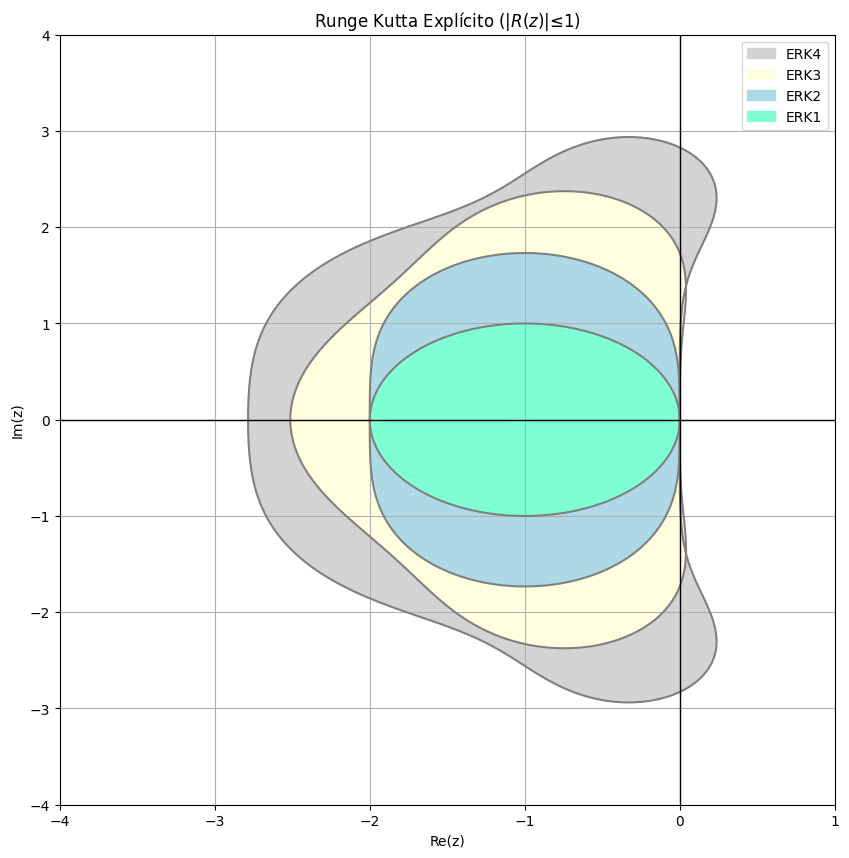

In [38]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 

x = np.linspace(-4.0, 1.0, 400)
y = np.linspace(-4.0, 4.0, 400)
xx, yy = np.meshgrid(x, y)
z = xx + 1j*yy

def RungeKutta1(z):
    return 1 + z 

def RungeKutta2(z):
    return RungeKutta1(z) + (z**2)/2

def RungeKutta3(z):
    return RungeKutta2(z) + (z**3)/6 

def RungeKutta4(z):
    return RungeKutta3(z) + (z**4)/24


RE_ERK4 = np.abs(RungeKutta4(z))
RE_ERK1 = np.abs(RungeKutta1(z))
RE_ERK2 = np.abs(RungeKutta2(z))
RE_ERK3 = np.abs(RungeKutta3(z))

plt.figure(figsize=(10,10))
plt.title('Runge Kutta Explícito ($|R(z)| ≤ 1$)')

plt.contourf(xx, yy, RE_ERK4, levels=[0,1], colors='lightgray')
plt.contour(xx, yy, RE_ERK4, levels=[1], colors="gray")

plt.contourf(xx, yy, RE_ERK3, levels=[0,1], colors='lightyellow')
plt.contour(xx, yy, RE_ERK3, levels=[1], colors="gray")

plt.contourf(xx, yy, RE_ERK2, levels=[0,1], colors='lightblue')
plt.contour(xx, yy, RE_ERK2, levels=[1], colors="gray")

plt.contourf(xx, yy, RE_ERK1, levels=[0,1], colors='aquamarine')
plt.contour(xx, yy, RE_ERK1, levels=[1], colors="gray")

patch_erk1 = mpatches.Patch(color='aquamarine', label='ERK1')
patch_erk2 = mpatches.Patch(color='lightblue', label='ERK2')
patch_erk3 = mpatches.Patch(color='lightyellow', label='ERK3')
patch_erk4 = mpatches.Patch(color='lightgray', label='ERK4')
plt.legend(handles=[patch_erk4, patch_erk3, patch_erk2, patch_erk1])

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.axhline(0, color='black', lw=1, zorder=2) 
plt.axvline(0, color='black', lw=1, zorder=2)